# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2020 elections results. This is the notebook for the first week.

In [10]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [11]:
# First install tha needed packages using conda in the current Jupyter kernel
import sys
if not(run_in_colab):
  !conda install --yes --prefix {sys.prefix} numpy
  !conda install --yes --prefix {sys.prefix} pandas
  !conda install --yes --prefix {sys.prefix} matplotlib

# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [12]:
# Import modules 

import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames


First, we need to mount our local drive to the colab network

In [13]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Loading elections 2020 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

MessageError: ignored

In [21]:
import io

data_type = "city" # "ballot"  # city
if   True:
    df_2020_raw = pd.read_csv('/content/votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2020_raw = pd.read_csv( '/content/votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[8:-1]] # removing "metadata" columns
    else:
        df_2020_raw = pd.read_csv(data_path + 'votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe
print(df_2020_raw.columns)
df_2020_raw.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג',
       'ודעם', 'ז', 'זך', 'זץ', 'טב', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק',
       'קי', 'קך', 'קץ', 'שס', 'Unnamed: 37'],
      dtype='object')


,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,2018,595,6,589,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,2,472,4821,2718,36,2682,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,6,473,9422,6090,53,6037,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,18,958,142,41,1,40,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,18,968,3037,1336,8,1328,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN


In [ ]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2020".format(df_2020_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')



327702 votes in March 2020 מעטפות חיצוניות 


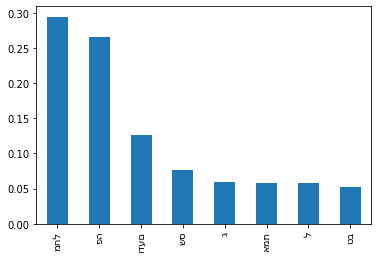

In [66]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2020, 0.0325)  # total votes for each party
total_votes.plot.bar()



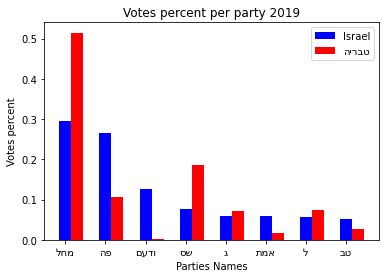

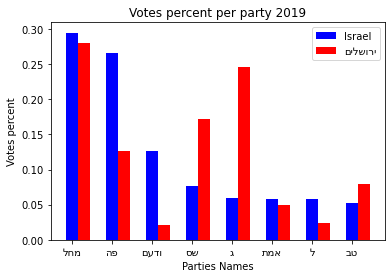

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Votes percent per party 2019'}, xlabel='Parties Names', ylabel='Votes percent'>)

In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')

Show histogram of number of votes for a party 


In [ ]:
def find_top_city(df, party):

  votes_percent_per_city = df.div(df.sum(axis=1), axis=0)
  print(votes_percent_per_city[party].max())
  print(votes_percent_per_city[party].idxmax())

find_top_city(df_2020, 'מחל')
find_top_city(df_2020, 'פה')
find_top_city(df_2020, 'ג')
find_top_city(df_2020, 'ודעם')

0.8726591760299626
שדי תרומות
0.7797927461139896
עין יהב
0.9672131147540983
קוממיות
1.0
אבו עבדון שבט


Next, we want to compare two parties

In [53]:
# Show party votes for two parties
import matplotlib.pyplot as plt

def two_parties_scatter(df, party1, party2):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city
    rational_votes_num_per_city = (votes_num_per_city/votes_num_per_city.max())*200

    plt.scatter(party_share1, party_share2,s=rational_votes_num_per_city)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()


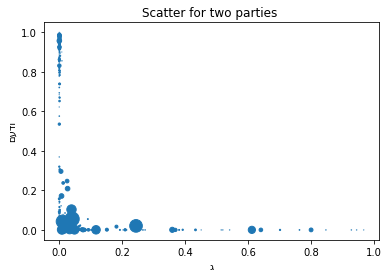

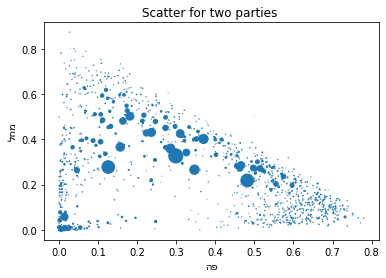

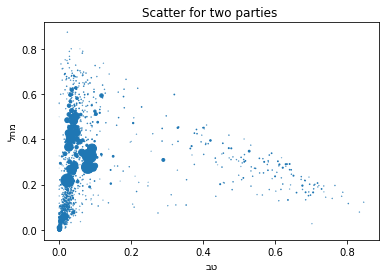

In [65]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]]
two_parties_scatter(df_2020, "ג", "ודעם")
two_parties_scatter(df_2020, "פה", "מחל")
two_parties_scatter(df_2020, "טב", "מחל")


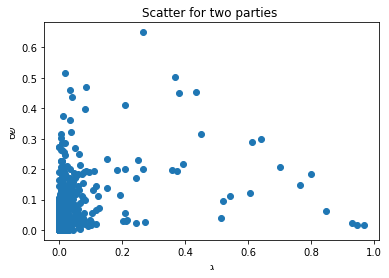

In [ ]:
two_parties_scatter(df_2020, "ג", "שס")

In [ ]:
# Check sum of eligible votes 
df_2020.sum(axis=1) - df_2020_raw['כשרים'] 

שם ישוב
אבו גווייעד שבט     0
אבו גוש             0
אבו סנאן            0
אבו עבדון שבט       0
אבו קורינאת שבט     0
                   ..
תקומה               0
תקוע                0
תראבין אצאנע שבט    0
תראבין אצאנעישוב    0
תרום                0
Length: 1214, dtype: int64

Compute pairwise correlations between parties:

In [ ]:
df_2020.shape

(1214, 30)

In [ ]:
parties_corr = df_2020.corr()
print(parties_corr)

           אמת         ג      ודעם         ז        זך  זץ        טב  \
אמת   1.000000  0.304462  0.270346  0.875118  0.702850 NaN  0.696774   
ג     0.304462  1.000000  0.085095  0.344568  0.362572 NaN  0.556217   
ודעם  0.270346  0.085095  1.000000  0.281739  0.336982 NaN  0.218383   
ז     0.875118  0.344568  0.281739  1.000000  0.817508 NaN  0.879671   
זך    0.702850  0.362572  0.336982  0.817508  1.000000 NaN  0.771325   
זץ         NaN       NaN       NaN       NaN       NaN NaN       NaN   
טב    0.696774  0.556217  0.218383  0.879671  0.771325 NaN  1.000000   
י     0.587854  0.291903  0.221886  0.700717  0.787504 NaN  0.606822   
יז    0.745184  0.338655  0.344909  0.941494  0.791830 NaN  0.862904   
ינ    0.320324  0.164336  0.867100  0.430977  0.444321 NaN  0.382364   
יף    0.587325  0.332086  0.387211  0.675577  0.750056 NaN  0.693018   
יק    0.623761  0.593927  0.323269  0.735350  0.780575 NaN  0.806887   
יר    0.754937  0.384407  0.353622  0.879396  0.853241 NaN  0.81

Show heatmap of the correlation matrix: 


          ודעם       אמת        פה  ...       מחל         ל        טב
ודעם  1.000000  0.270346  0.242808  ...  0.215532  0.181892  0.218383
אמת   0.270346  1.000000  0.961585  ...  0.766607  0.574818  0.696774
פה    0.242808  0.961585  1.000000  ...  0.851207  0.706878  0.727464
ג     0.085095  0.304462  0.262384  ...  0.447915  0.297783  0.556217
שס    0.152106  0.560086  0.568255  ...  0.796311  0.631308  0.793682
מחל   0.215532  0.766607  0.851207  ...  1.000000  0.877216  0.873010
ל     0.181892  0.574818  0.706878  ...  0.877216  1.000000  0.633572
טב    0.218383  0.696774  0.727464  ...  0.873010  0.633572  1.000000

[8 rows x 8 columns]
Index(['ודעם', 'אמת', 'פה', 'ג', 'שס', 'מחל', 'ל', 'טב'], dtype='object')


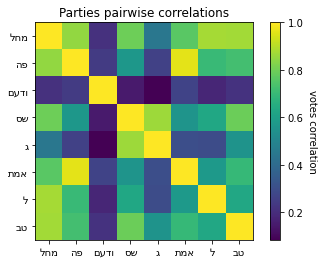

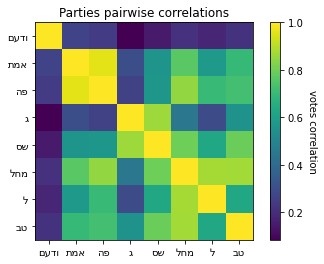

In [119]:
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

    
# need to extract only top 8 parties 
parties_corr=df_2020[parties_votes_percents(df_2020,0.0325).index].corr()
heatmap_corr(parties_corr, list(parties_corr.columns))
df_orderd=df_2020[["טב","ל","מחל","שס","ג","פה","אמת","ודעם"][::-1]]

parties_corr_ordered=df_orderd.corr()
print( parties_corr_ordered)
heatmap_corr(parties_corr_ordered,list(parties_corr_ordered.columns))
print(parties_corr_ordered.columns)

Create a dictionary mapping parties names to voting letters

In [ ]:
parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}
print(parties_dict_2020["טב"])
print(parties_dict_2020["ג"])
print(parties_dict_2020["ודעם"])


ימינה
יהדות התורה
הרשימה המשותפת


Read the election results by ballot (not city)

In [ ]:
df_2020_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballots_raw.head()

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,9870,967,1.0,1,0,585,126,2,124,...,0,6,1,0,0,0,0,0,2,NaN
אבו גווייעד שבט,18,9871,967,2.0,1,0,764,249,2,247,...,0,0,0,0,0,0,0,2,0,NaN
אבו גווייעד שבט,18,9872,967,3.0,1,0,669,220,2,218,...,0,2,1,0,0,0,0,0,0,NaN
אבו גוש,2,736,472,1.0,1,0,530,299,7,292,...,0,11,0,0,0,0,0,0,2,NaN
אבו גוש,2,737,472,2.0,1,0,693,388,6,382,...,0,18,0,0,0,0,0,1,0,NaN


In [ ]:
df_2020_ballots = df_2020_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020_ballots = df_2020_ballots[df_2020_ballots.columns[8:-1]] # removing "metadata" columns
df_2020_ballots.head()

,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,124,2,0,112,0,0,0,0,0,0,...,0,0,6,1,0,0,0,0,0,2
אבו גווייעד שבט,247,6,0,235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
אבו גווייעד שבט,218,5,0,207,0,0,0,0,0,1,...,0,0,2,1,0,0,0,0,0,0
אבו גוש,292,15,1,229,0,0,0,0,0,0,...,0,0,11,0,0,0,0,0,0,2
אבו גוש,382,6,0,330,0,0,0,0,0,0,...,0,0,18,0,0,0,0,0,1,0


<AxesSubplot:>

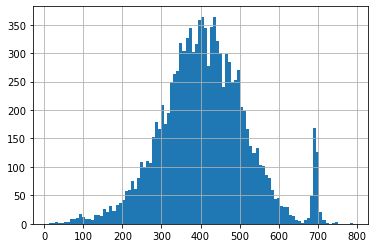

In [ ]:
df_2020_ballots_raw['כשרים'].hist(bins=100)

In [ ]:
df_2020_ballots_raw.shape

(11179, 41)

In [ ]:
51922 * 111344 / 84846

68137.6042241237